## **Library (Package Management)**
1. numpy
2. pandas
3. matplotlib
4. seaborn
5. sklearn
6. os
7. pickle

In [1]:
# Useful library for linear algebra functions
import numpy as np
#Library for data processing , CSV file I/O
import pandas as pd
# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library for statistical data visualization
%matplotlib inline
# Library for feature selection
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Library for data splitting
from sklearn.model_selection import train_test_split
# import SVC classifier
from sklearn.svm import SVC
# Library for performance analysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
# Import package
import os
# To save to and load model from the file
import pickle
# To mount Google Drive to read dataset from the drive (authentication required)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Preprocessing**
 1. Load data
 2. Clean data
 3. Explore/Visualize data
     - Heatmap for the dataset
     - Bar chart of depression severity
     - Line graph of means for each attributes
 4. Split data 

### Load data
Load the data from the dataset that is uploaded in the drive

In [2]:
# Read data from file
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Group Project/Finalized Code/depressionDataset.csv") # change to your own file path of the dataset
# view dimensions of dataset
df.shape

(16150, 16)

In [3]:
# Preview the dataset
df.head()

,id,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,score,class,time,period.name,start.time
0,1.0,3.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,3.0,15.0,3.0,2017-01-22 20:11:59,evening,2017-01-09 07:22:37
1,2.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,1.0,2017-02-08 22:53:06,evening,2017-01-09 07:22:37
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-02-08 08:00:46,morning,2017-01-09 07:22:37
3,4.0,2.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,0.0,3.0,14.0,2.0,2017-01-22 14:01:25,midday,2017-01-09 07:22:37
4,5.0,1.0,3.0,1.0,1.0,2.0,1.0,2.0,3.0,0.0,1.0,15.0,3.0,2017-01-21 15:37:24,midday,2017-01-09 07:22:37


In [4]:
# Get number of features available from given dataset
features = [f for f in df.columns if f not in ['class']]
len(features)

15

In [5]:
# view the current column names of the dataframe
col_names = df.columns
col_names

Index(['id', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10',
       'score', 'class', 'time', 'period.name', 'start.time'],
      dtype='object')

In [6]:
# check distribution of target_class column
df['class'].value_counts()

3.0    3635
2.0    3585
0.0    3018
1.0    2902
4.0    2783
Name: class, dtype: int64

In [7]:
# view the distribution of target_class column
df['class'].value_counts()/np.float64(len(df))

3.0    0.225077
2.0    0.221981
0.0    0.186873
1.0    0.179690
4.0    0.172322
Name: class, dtype: float64

### Clean data
Remove unnecessary features from the dataset imported. Check whether the dataset contains null values, replace all of them with 0s.

In [8]:
# Remove unnecessary features from dataset
df.drop(['id', 'score', 'time', 'period.name', 'start.time'], axis=1, inplace=True)
df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,class
0,3.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0
1,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,0.0,3.0,2.0
4,1.0,3.0,1.0,1.0,2.0,1.0,2.0,3.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
16145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# update the feature list after removing unused features
updated_features = [f for f in df.columns if f not in ['class']]
len(updated_features)

10

In [10]:
# check for missing values in variables
noOfNullValue = df.isnull().sum()
noOfNullValue

q1       227
q2       227
q3       227
q4       227
q5       227
q6       227
q7       227
q8       227
q9       227
q10      227
class    227
dtype: int64

In [11]:
# Replace all NaN elements with 0s
df['q1'] = df['q1'].fillna(df['q1'].mode()[0])
df['q2'] = df['q2'].fillna(df['q2'].mode()[0])
df['q3'] = df['q3'].fillna(df['q3'].mode()[0])
df['q4'] = df['q4'].fillna(df['q4'].mode()[0])
df['q5'] = df['q5'].fillna(df['q5'].mode()[0])
df['q6'] = df['q6'].fillna(df['q6'].mode()[0])
df['q7'] = df['q7'].fillna(df['q7'].mode()[0])
df['q8'] = df['q8'].fillna(df['q8'].mode()[0])
df['q9'] = df['q9'].fillna(df['q9'].mode()[0])
df['q10'] = df['q10'].fillna(df['q10'].mode()[0])
df['class'] = df['class'].fillna(df['class'].mode()[0])

In [12]:
# check for missing values in variables
# at this point, it should be all 0
noOfNullValue = df.isnull().sum()
noOfNullValue

q1       0
q2       0
q3       0
q4       0
q5       0
q6       0
q7       0
q8       0
q9       0
q10      0
class    0
dtype: int64

In [13]:
# view summary statistics in numerical variables
round(df.describe(), 2)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,class
count,16150.00,16150.00,16150.00,16150.00,16150.00,16150.00,16150.00,16150.0,16150.00,16150.00,16150.00
mean,1.07,1.15,1.21,1.24,1.11,1.30,1.12,1.2,1.22,1.20,2.03
std,1.13,1.13,1.19,1.19,1.09,1.12,1.09,1.2,1.25,1.21,1.36
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00
50%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,2.00
75%,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.0,3.00,2.00,3.00
max,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0,3.00,3.00,4.00


### Explore/Visualize data

#### Heatmap for the dataset

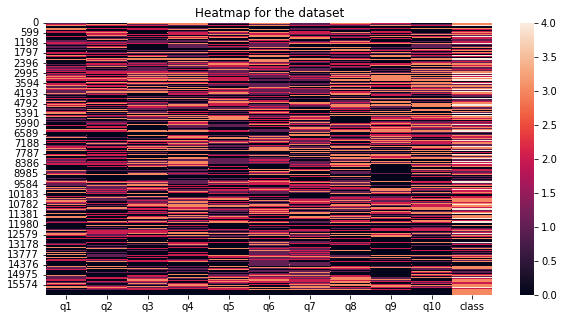

In [14]:
# use heatmap to visualize dataset
plt.figure(figsize=(10, 5))
plt.title("Heatmap for the dataset")
sns.heatmap(df)
plt.show()

#### Bar chart of depression severity

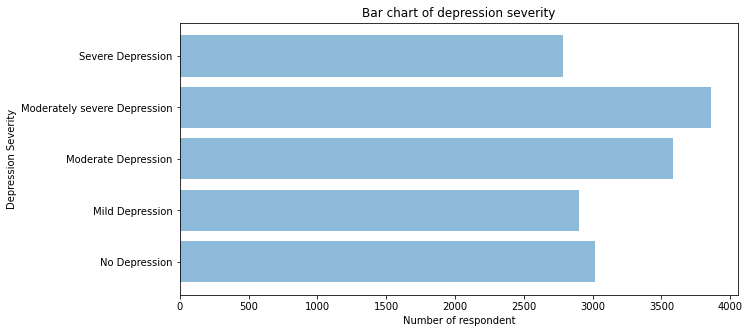

In [15]:
# Compare the severity of depression available in this dataset
no_depression = df.loc[:,"class"].eq(0).sum()
mild_depression = df.loc[:,"class"].eq(1).sum()
moderate_depression = df.loc[:,"class"].eq(2).sum()
moderately_severe_depression = df.loc[:,"class"].eq(3).sum()
severe_depression = df.loc[:,"class"].eq(4).sum()
depressionSeverity = ["No Depression", "Mild Depression", "Moderate Depression", "Moderately severe Depression", "Severe Depression"]
plt.figure(figsize=(10, 5))
plt.barh(depressionSeverity, [no_depression, mild_depression, moderate_depression, moderately_severe_depression, severe_depression], align='center', alpha=0.5)
plt.xlabel('Number of respondent')
plt.ylabel("Depression Severity")
plt.title("Bar chart of depression severity")
plt.show()

#### Line graph of means for each attributes

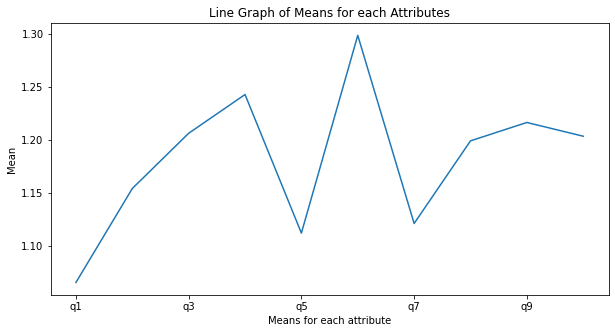

In [16]:
# allocate dataframe
X = df.iloc[:, 0:10]
plt.figure(figsize=(10, 5))
#plot the mean
X.mean().plot(kind='line')
plt.ylabel('Mean')
plt.xlabel("Means for each attribute")
plt.title('Line Graph of Means for each Attributes')
plt.show()

### Splitting the data

In [17]:
# split data into X and Y
X = df.drop(['class'], axis=1).values
Y = df['class'].values.ravel()
# check and verify if the rows and columns are correct
print(X.shape)

(16150, 10)


## **Modelling and Training**
1. Feature selection
2. Splitting the data with selected features
3. Train model
4. Save model
5. Load model
6. Test Model

### Feature Selection

In [18]:
# Feature selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=9)
fit = rfe.fit(X, Y)
print("Number of features selected: %s" % (fit.n_features_))
print("Selected features: %s" % (fit.support_))
print("Ranking of features: %s" % (fit.ranking_))

Number of features selected: 9
Selected features: [ True  True  True  True  True  True False  True  True  True]
Ranking of features: [1 1 1 1 1 1 2 1 1 1]


In [19]:
# Obtain the list of features selected
final_features = []
indexes = np.where(fit.support_ == True)
for x in np.nditer(indexes):
    final_features.append(updated_features[x])
print(final_features)

['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q8', 'q9', 'q10']


### Splitting data with selected features



In [20]:
x = df[final_features]
y = df['class']

# Splitting data into 80% training and 20% testing sets, random_state = 24
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)
x_train

,q1,q2,q3,q4,q5,q6,q8,q9,q10
7897,2.0,2.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0
4787,0.0,3.0,3.0,2.0,3.0,3.0,0.0,2.0,2.0
15076,2.0,1.0,3.0,3.0,1.0,1.0,0.0,3.0,0.0
4211,2.0,2.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0
16056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3473,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
8535,2.0,2.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0
14528,3.0,3.0,2.0,3.0,2.0,3.0,1.0,2.0,0.0
899,2.0,1.0,2.0,0.0,3.0,2.0,0.0,1.0,0.0


In [21]:
# check the shape of X_train and X_test dataset
x_train.shape, x_test.shape

((12920, 9), (3230, 9))

### Support-vector machine model
Use support vector classifier with different kernels, choose the one with the highest accuracy to be our model

#### Support-vector classifer with rbf kernel

In [22]:
# instantiate classifier with default hyperparameters (rbf kernel)
svc = SVC(probability=True)

# fit classifier to training set
svc.fit(x_train, y_train)

# make predictions on test set
y_pred_svc = svc.predict(x_test)

# Get probability from test set
pred_prob_svc = svc.predict_proba(x_test)

# compute and print accuracy score
accuracy_svc = round(accuracy_score(y_test, y_pred_svc), 4)
model_accuracy = {}
model_accuracy[svc] = accuracy_svc
print('Model accuracy score with default hyperparameters (rbf kernel):', accuracy_svc)

Model accuracy score with default hyperparameters (rbf kernel): 0.8706


#### Support-vector classifer with linear kernel

In [23]:
# instantiate classifier with linear kernel and C=1.0
linear_svc = SVC(kernel='linear', C=1.0, probability=True)

# fit classifier to training set
linear_svc.fit(x_train, y_train)

# make predictions on test set
y_pred_linear = linear_svc.predict(x_test)

# Get probability from test set
pred_prob_linear = linear_svc.predict_proba(x_test)

# compute and print accuracy score
accuracy_linear = round(accuracy_score(y_test, y_pred_linear), 4)
model_accuracy[linear_svc] = accuracy_linear
print('Model accuracy score with linear kernel:', accuracy_linear)

Model accuracy score with linear kernel: 0.8681


#### Support-vector classifer with polynomial kernel

In [24]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc = SVC(kernel='poly', C=1.0, probability=True) 

# fit classifier to training set
poly_svc.fit(x_train,y_train)

# make predictions on test set
y_pred_poly = poly_svc.predict(x_test)

# Get probability from test set
pred_prob_poly = poly_svc.predict_proba(x_test)

# compute and print accuracy score
accuracy_poly = round(accuracy_score(y_test, y_pred_poly), 4)
model_accuracy[poly_svc] = accuracy_poly
print('Model accuracy score with polynomial kernel:', accuracy_poly)

Model accuracy score with polynomial kernel: 0.8641


#### Determine the best model
Compare the accuracy score of the models and choose the best model

In [25]:
model_accuracy

{SVC(kernel='linear', probability=True): 0.8681,
 SVC(kernel='poly', probability=True): 0.8641,
 SVC(probability=True): 0.8706}

In [26]:
# to determine the model with the highest accuracy score
highest_accuracy = max(accuracy_svc, accuracy_linear, accuracy_poly)
for model in model_accuracy:
  if (model_accuracy[model] == highest_accuracy):
    best_model = model
best_model

SVC(probability=True)

In [27]:
# assign the y_pred of best model to be the y_pred
# in this case, the best model is svc, so 'y_pred_svc' is assigned.
y_pred = y_pred_svc

### Save Model

In [28]:
def saveModel(model):
  #set the file path to save the file, and also the filename to be saved
  #the model is saved as .sav file
  filepath = '/content/drive/MyDrive/Machine Learning Group Project/Finalized Code/depression_indicator_model.sav'  # change to your own filepath

  #save the model using pickle.dump
  pickle.dump(model, open(filepath, 'wb'))

In [29]:
# save the model with higer accuracy score (in this case is svc)
saveModel(best_model)

### Load Model

In [30]:
def loadModel():
  #get the file path and also the filename to be loaded
  filepath = '/content/drive/MyDrive/Machine Learning Group Project/Finalized Code/depression_indicator_model.sav'  # change to your own filepath

  #load the model using pickel.load
  loaded_model = pickle.load(open(filepath, 'rb'))
  return loaded_model

In [31]:
model = loadModel()

### Test Model

**Input:**
0. Not at all
1. Several days
2. More than half the days
3. Nearly every day.


**Question**
1.   Little interest or pleasure in doing things
2.   Feeling down, depressed or hopeless
3.   Trouble falling or staying asleep, or sleeping too much
4.   Feeling tired or having little energy
5.   Poor appetite or overeating
6.   Feeling bad about yourself - or that you are a failure or have let yourself or your family down
7.   Trouble concentrating on things, such as reading the newspaper or watching television
8.   Moving or speaking so slowly that other people could have noticed
9.   Thoughts that you would be better off dead, or of hurting yourself
10.  If you've had any days with issues above, how difficult have these problems made it for you at work, home, school, or with other people?

Percentage of probability
No Depression : 0.007948643747992356
Mild Depression : 0.01029202426095368
Moderate Depression : 4.9291017184490435
Moderately severe Depression : 94.02151690081686
Severe Depression : 1.0311407127251322



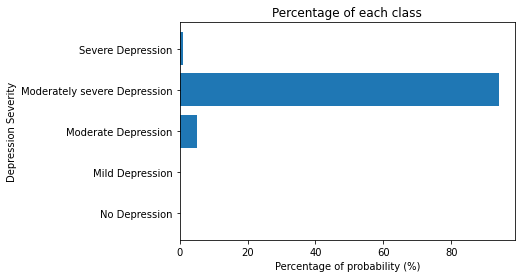


Your Depression test result: Moderately severe Depression 

You might have these following symptoms:
1. Avoiding social activities
2. Inconsistent sleeping pattern
3. Increased sentivities and excessive worrying
4. Fatigue
5. Low of energy for most of the day 

Recommended activities:
1. Do recreational activities which involve social interaction
2. Musical theraphy
3. Get psychotheraphy treatment
4. Try interacting with pets and animals
5. Reach out for help from family or friends


In [32]:
# Inserting own inputs for the attributes get sample output of model
dep = {'q1':[1], 'q2':[2], 'q3':[3], 'q4':[0], 'q5':[2], 'q6':[1], 'q8':[1], 'q9':[3], 'q10':[2]}
depression = pd.DataFrame(data=dep)
test_Predict = model.predict(depression)
test_Predict_prob = model.predict_proba(depression)
# Probability of each depression class 
print('Percentage of probability')
j = 0
x_list = []
y_list = []
for i in test_Predict_prob[0]:
  print("{} : {c}". format(depressionSeverity[j], c = i*100))
  y_list.append(depressionSeverity[j])
  x_list.append(i*100)
  j += 1

print()
plt.barh(y_list, x_list) 
plt.xlabel("Percentage of probability (%)")
plt.ylabel("Depression Severity")
plt.title("Percentage of each class")
plt.show()

if test_Predict[0] == 0:
    result = 'No Depression'
    symptom = 'No depression symptom.'
    note = 'Keep on with your lifestyle'
if test_Predict[0] == 1:
    result = 'Mild Depression'
    symptom = 'You might have these following symptoms:\n1. Hopelessness\n2. Difficulties concentrating on task\n3. Dudden disinterest in socializing\n4. Lack of motivation'
    note = 'Recommended activities:\n1. Exersice regularly\n2. Have a regular sleep schedule\n3. Eating a well balanced diet rich in fruits and vegetables\n4. Consider contacting a doctor if necessary.'
if test_Predict[0] == 2:
    result = 'Moderate Depression'
    symptom = 'You might have these following symptoms:\n1. Low self-esteem\n2. Reduced productivity\n3. Feeling unworthy\n4. Increased anxiety'
    note = 'Recommended activities:\n1. Practicing yoga or meditation\n2. Do physical exersice regularly\n3. Practice self-care in daily life\n4. Have a well-balanced diet\n5. Consider contacting a doctor if necessary.'
if test_Predict[0] == 3:
    result = 'Moderately severe Depression'
    symptom = 'You might have these following symptoms:\n1. Avoiding social activities\n2. Inconsistent sleeping pattern\n3. Increased sentivities and excessive worrying\n4. Fatigue\n5. Low of energy for most of the day'
    note = 'Recommended activities:\n1. Do recreational activities which involve social interaction\n2. Musical theraphy\n3. Get psychotheraphy treatment\n4. Try interacting with pets and animals\n5. Reach out for help from family or friends'
if test_Predict[0] == 4:
    result = 'Severe Depression'
    symptom = 'You might have these following symptoms for 2-weeks or longer:\n1. Feeling extremely depressed\n2. Losing interest\n3. Fatigueness and loss of interest\n4. Delusions\n5. Feelings of stupor\n6. Suicidal thoughts or behaviors'
    note = 'Recommended activities:\n1. Pcychotheraphy treatment\n2. Medicatications treatment\n3. Reach out for help from family or friends.'

print("\nYour Depression test result:", result, "\n")
print(symptom, "\n")
print(note)

## **Performance Analysis**

1.   Area Under the ROC curve (AUC)
2.   Confusion matrix
3.   Classification Report (Precision, recall, F1 score)

### Area Under the ROC curve (AUC)

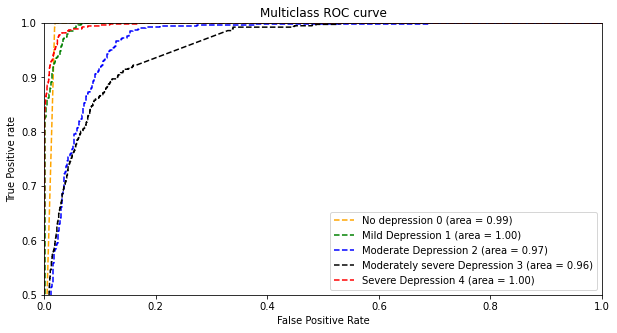

In [33]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

# Number of classification
num_class = 5

# Store data
for i in range(num_class): 
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_svc[:,i], pos_label = i)
  roc_auc[i] = auc(fpr[i], tpr[i])

# plotting data 
fig= plt.subplots(figsize=(10, 5))
plt.xlim(0,1.0)
plt.ylim(0.5,1.0)
plt.plot(fpr[0], tpr[0], linestyle='--', color = 'orange', label = "No depression {0} (area = {1:0.2f})".format(0, roc_auc[0]))
plt.plot(fpr[1], tpr[1], linestyle='--', color = 'green', label = "Mild Depression {0} (area = {1:0.2f})".format(1, roc_auc[1]))
plt.plot(fpr[2], tpr[2], linestyle='--', color = 'blue', label = "Moderate Depression {0} (area = {1:0.2f})".format(2, roc_auc[2]))
plt.plot(fpr[3], tpr[3], linestyle='--', color = 'black', label = "Moderately severe Depression {0} (area = {1:0.2f})".format(3, roc_auc[3]))
plt.plot(fpr[4], tpr[4], linestyle='--', color = 'red', label="Severe Depression {0} (area = {1:0.2f})".format(4, roc_auc[4]))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')

# Save figure 
plt.show() 

### Confusion Matrix

In [34]:
# To find confusion matrix for the classification model
def getConfusionMatrix(y_test, y_pred): 
  matrix = confusion_matrix(y_test, y_pred )
  print("Confusion Matrix: \n", matrix, "\n")
  # To visualize the confusion matrix using a heatmap
 
  plt.figure(figsize=(10, 5))
  heatmap = sns.heatmap(matrix, annot=True, fmt='g')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix')
  plt.show()   

Confusion Matrix: 
 [[579   2   0   0   0]
 [  1 527  70   0   0]
 [  0  28 607  77   0]
 [ 50   0 115 598  25]
 [  0   0   0  50 501]] 



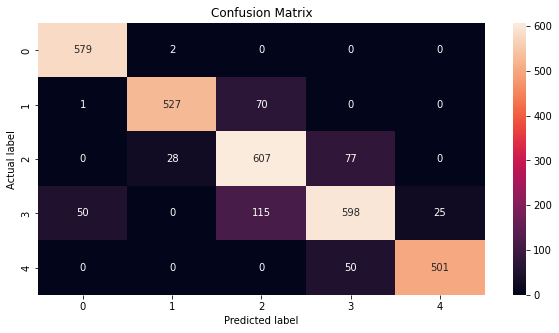

In [35]:
getConfusionMatrix(y_test, y_pred)

### Classification Report (Precision, recall, F1 score)

In [36]:
# To obtain classification report for the model (precision, recall, F1 score)
def getClassification_report(y_test, y_pred):
  print(classification_report(y_test, y_pred), "\n")
  # To visualize the classification report using a heatmap
  labels = [0, 1, 2, 3, 4]
  report = classification_report(y_test, y_pred, labels = labels, target_names = depressionSeverity, output_dict= True)
  plt.figure(figsize=(10, 10))
  sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
  plt.title('Classification Report')
  plt.show()

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       581
         1.0       0.95      0.88      0.91       598
         2.0       0.77      0.85      0.81       712
         3.0       0.82      0.76      0.79       788
         4.0       0.95      0.91      0.93       551

    accuracy                           0.87      3230
   macro avg       0.88      0.88      0.88      3230
weighted avg       0.87      0.87      0.87      3230
 



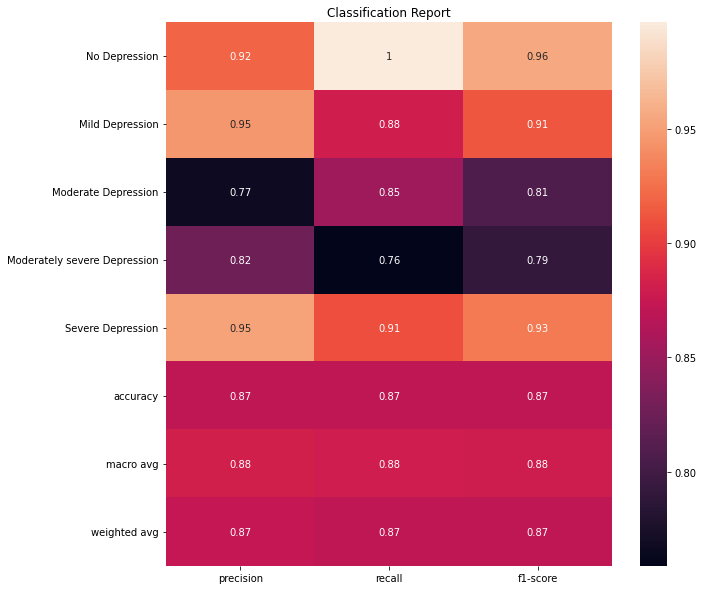

In [37]:
getClassification_report(y_test, y_pred)